# 1. Понимание бизнеса

## 1.1 Цель
Предсказать качество вина

## 1.2 Описание

В данной задаче рассматривается набор данных, описывающий различные качества вариантов красного и белого португальского вина "Винью Верде". Из-за проблем с конфиденциальностью и логистики доступны только физико-химические (исходные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т.д.).

Этот набор данных можно использовать в задачах классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин едят больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Так что было бы интересно протестировать методы выбора функций.

# 2. Data Understanding

## 2.1 Import Libraries

In [64]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


# Modelling Helpers
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
matplotlib.style.use( 'ggplot' )
sns.set_style( 'white' )
matplotlib.rcParams['figure.figsize'] = 14, 7

## 2.2 Загрузка данных

In [25]:
wine = pd.read_csv(r'winequality.csv')

## 2.3 Статистика и визуализации

In [9]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Описание переменных:**

1) Тип вина  
2) фиксированная кислотность  
3) переменная кислотность  
4) критическое значение кислотности  
5) остаточный сахар  
6) уровень хлорида  
7) уровень свободного диоксида серы  
8) полный уровень диоксида серы  
9) плотность  
10) pH  
11) уровень сульфатов  
12) процентное кол-во алкоголя  
13) - Качество напитка (значение между 0 и 10)

### 2.4.1 Далее взглянем на некоторую ключевую информацию о переменных

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

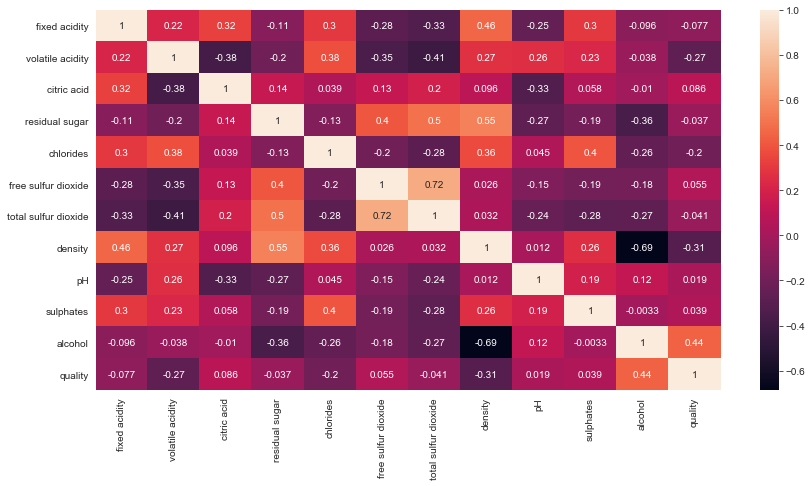

In [7]:
sns.heatmap(wine.corr(), annot=True)
plt.show()

Ключевое, что здесь стоит отметить - отсутствует значимая корелляция медлу признаками.  
Все значения пригодятся при обучении модели впоследствии.

# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

Преобразуем значения 1го столбца датасета в числовые

In [27]:
enc = LabelEncoder()
type_ = enc.fit_transform(wine.type)
wine.type = type_

## 3.2 Заполнить пропущенные значения в переменных

Проверим наличие пропусков, и заменим их на среднее значение в случае наличия

In [26]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [28]:
fixed_acidity = wine['fixed acidity'].fillna(wine['fixed acidity'].mean())
volatile_acidity = wine['volatile acidity'].fillna(wine['volatile acidity'].mean())
citric_acid = wine['citric acid'].fillna(wine['citric acid'].mean())
residual_sugar = wine['residual sugar'].fillna(wine['residual sugar'].mean())
chlorides = wine['chlorides'].fillna(wine['chlorides'].mean())
pH = wine['pH'].fillna(wine['pH'].mean())
sulphates = wine['sulphates'].fillna(wine['sulphates'].mean())

wine['fixed acidity'] = fixed_acidity
wine['volatile acidity'] = volatile_acidity
wine['citric acid'] = citric_acid
wine['residual sugar'] = residual_sugar
wine['chlorides'] = chlorides
wine['pH'] = pH
wine['sulphates'] = sulphates

In [29]:
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3.3 Сборка финальных датасетов для моделирования

Перемешаем записи, чтобы разные класссы попали и обучающуюся и тестовую выборки

In [50]:
wine = wine.sample(frac=1).reset_index(drop=True)

Разделим датасет на обучающуюся и тестовую выборки

In [51]:
x_train, x_test, y_train, y_test = train_test_split(wine.drop(['quality'], axis=1), wine['quality'], train_size=0.75)

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Хорошей отправной точкой является логистическая регрессия.

In [57]:
logRe = LogisticRegression()
Dtree = DecisionTreeClassifier()
svc = LinearSVC()

## 4.2 Обучение модели

In [58]:
logRe.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
svc.fit(x_train, y_train)

LinearSVC()

# 5. Оценка
Теперь мы собираемся оценить модель

## 5.1 Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

In [60]:
y_pred_l = logRe.predict(x_test)
y_pred_d = Dtree.predict(x_test)
y_pred_s = svc.predict(x_test)
print(mse(y_pred_l, y_test))
print(mse(y_pred_d, y_test))
print(mse(y_pred_s, y_test))

0.7753846153846153
0.7403076923076923
0.8627692307692307


Лучший результат показала модель Linear Support Vector

# 6. Развертывание

Развертывание в данном означает публикацию полученного прогноза в таблицу лидеров Kaggle.

In [63]:
np.savetxt('wine_pred.csv', y_pred_s, delimiter=",")